In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('properties_cleaned_v2.csv')

In [4]:
df.head()

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.00,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,...,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.03,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,...,NaN,NaN,650.0,0,0,0,0,0,1,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.06,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,...,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.00,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,...,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.12,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,...,1345.0,NaN,NaN,1,0,0,0,0,0,0


In [5]:
df.shape

(3681, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3681 entries, 0 to 3680
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3681 non-null   object 
 1   society              3194 non-null   object 
 2   sector               3681 non-null   object 
 3   price                3664 non-null   float64
 4   persf_area           3664 non-null   float64
 5   area                 3664 non-null   float64
 6   areaWithType         3681 non-null   object 
 7   bedroom              3681 non-null   float64
 8   bathroom             3681 non-null   float64
 9   balcony              3595 non-null   object 
 10  floorNum             3662 non-null   float64
 11  facing               2633 non-null   object 
 12  agePossession        3681 non-null   object 
 13  super_built_up_area  1876 non-null   float64
 14  built_up_area        1692 non-null   float64
 15  carpet_area          1874 non-null   f

In [7]:
df.duplicated().sum()

4

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.head()

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.00,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,...,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.03,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,...,NaN,NaN,650.0,0,0,0,0,0,1,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.06,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,...,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.00,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,...,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.12,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,...,1345.0,NaN,NaN,1,0,0,0,0,0,0


### property_type

<Axes: xlabel='property_type'>

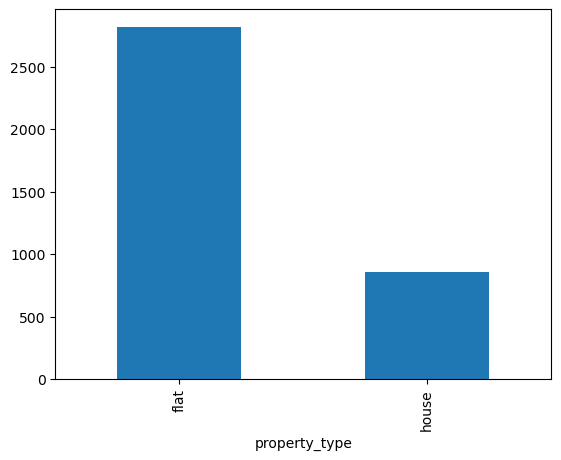

In [10]:
df['property_type'].value_counts().plot(kind='bar',)

#### Observations

- Flats are in majority(75 percent) and there are less number of houses(~25 percent)
- No missing values

### society

In [11]:
df['society'].value_counts().shape

(674,)

In [12]:
df['society'].value_counts()

society
tulip violet                            75
ss the leaf                             73
shapoorji pallonji joyville gurugram    42
dlf new town heights                    42
signature global park                   35
                                        ..
smartworld one dxp                       1
the arzoo cghs                           1
woodstock floors                         1
tashee capital gateway                   1
huda floor                               1
Name: count, Length: 674, dtype: int64

In [13]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
umang winter hills                      0.490596
ramsons kshitij                         0.494671
umang monsoon breeze                    0.498746
ireo the corridors                      0.502508
unitech uniworld resorts                0.506270
Name: proportion, Length: 75, dtype: float64

In [14]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 0,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 307}

<Axes: xlabel='society'>

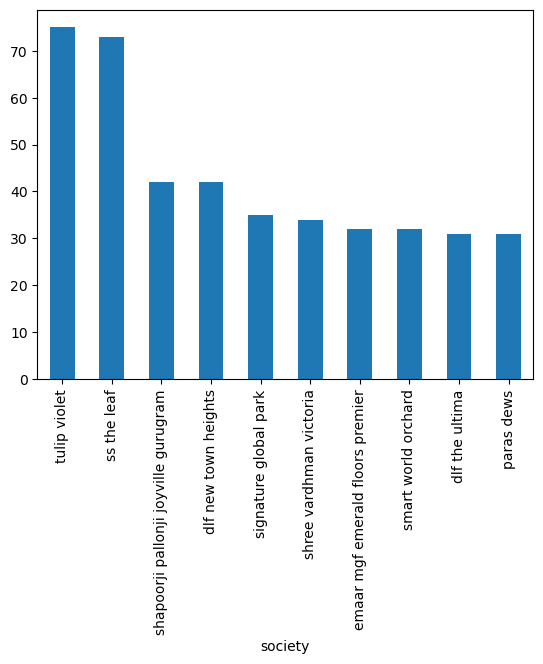

In [15]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [16]:
df['society'].isnull().sum()

487

In [17]:
df[df['society'].isnull()]

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2590,flat,NaN,sector 78,0.60,3692.0,1625.14,Built Up area: 1625 (150.97 sq.m.),2.0,2.0,NaN,...,NaN,1625.0,NaN,0,0,0,0,0,0,0
2823,house,NaN,sector 43,2.10,38251.0,549.00,Plot area 61(51 sq.m.),10.0,10.0,3+,...,NaN,549.0,NaN,0,1,0,0,0,0,20
2824,house,NaN,sector 54,5.00,43066.0,1161.00,Plot area 129(107.86 sq.m.),21.0,21.0,3+,...,NaN,1161.0,NaN,0,1,0,0,0,2,49
2825,house,NaN,sector 43,3.00,53763.0,558.00,Plot area 62(51.84 sq.m.),12.0,12.0,3+,...,NaN,558.0,NaN,0,0,0,0,1,2,20
2826,house,NaN,sector 43,4.50,39062.0,1152.00,Plot area 128(107.02 sq.m.),20.0,20.0,3+,...,NaN,1152.0,NaN,0,1,0,0,0,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,house,NaN,sector 46,5.65,23870.0,2367.00,Plot area 263(219.9 sq.m.),8.0,6.0,3+,...,NaN,2367.0,NaN,0,1,0,0,0,1,67
3673,house,NaN,sector 46,3.55,24500.0,1449.00,Plot area 161(134.62 sq.m.),5.0,4.0,3+,...,NaN,1449.0,NaN,0,1,0,0,0,1,73
3674,house,NaN,sector 46,3.60,24845.0,1449.00,Plot area 161(134.62 sq.m.),5.0,5.0,3+,...,NaN,1449.0,NaN,0,1,0,0,0,1,75
3675,house,NaN,sector 55,3.10,20026.0,1548.00,Plot area 172(143.81 sq.m.),5.0,4.0,3+,...,NaN,1548.0,NaN,0,1,1,0,0,1,59


#### Observations

- Around 13% properties comes under independent tag.
- There are 675 societies. 
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 273 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

### sector

In [18]:
# unique sectors
df['sector'].value_counts().shape

(113,)

<Axes: xlabel='sector'>

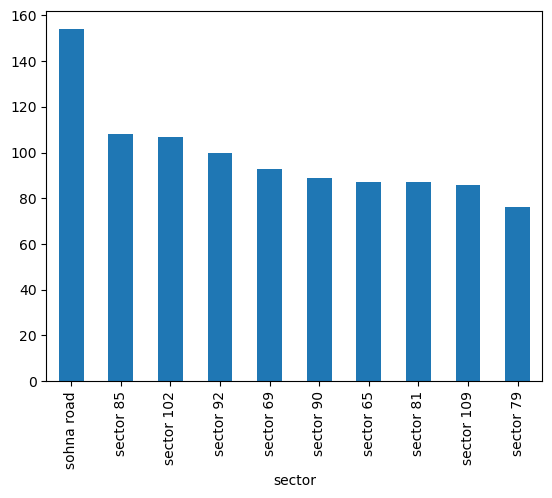

In [19]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [20]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 21,
 'Very Low (1)': 1}

#### Observations

- There are a total of 104 unique sectors in the dataset.
- Frequency distribution of sectors:
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 25 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 16 sectors have between 2 to 9 listings.
    - Very Low (1): Interestingly, there are no sectors with only 1 listing.

### Price

In [21]:
df['price'].isnull().sum()

17

In [22]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

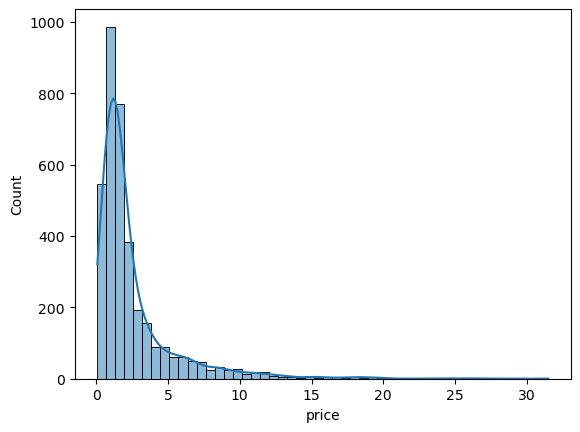

In [23]:
sns.histplot(df['price'], kde=True, bins=50)

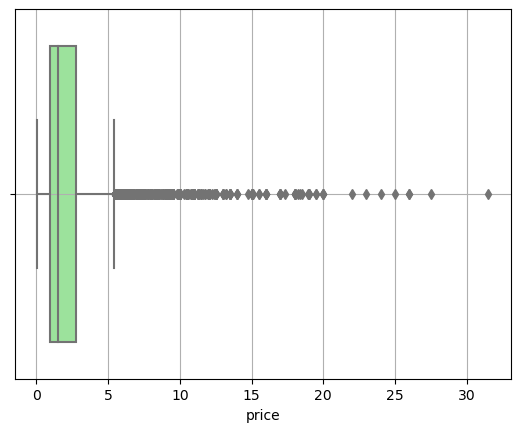

In [24]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

- Descriptive Statistics:

    - Count: There are 3,660 non-missing price entries.
    - Mean Price: The average price is approximately 2.53 crores.
    - Median Price: The median (or 50th percentile) price is 1.52 crores.
    - Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.


- Visualizations:

    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
 

- Missing Values: There are 17 missing values in the price column.

In [25]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.279170473313463 14.933372629214265


**Skewness**: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [26]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [27]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [28]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [29]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [30]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

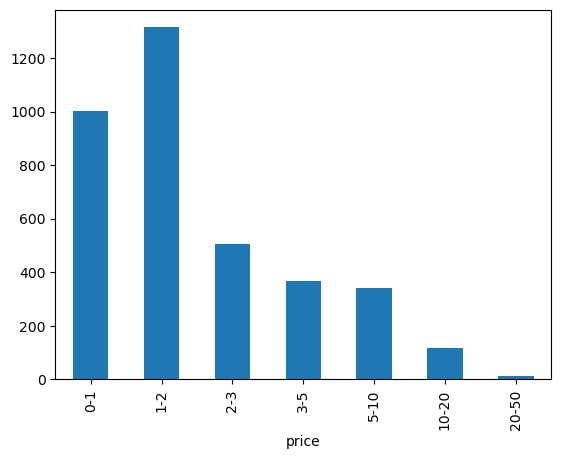

In [31]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

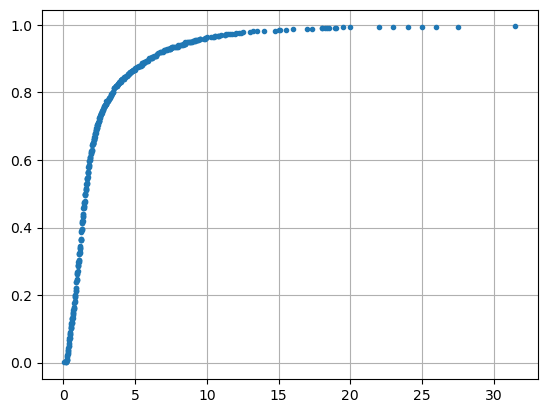

In [32]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


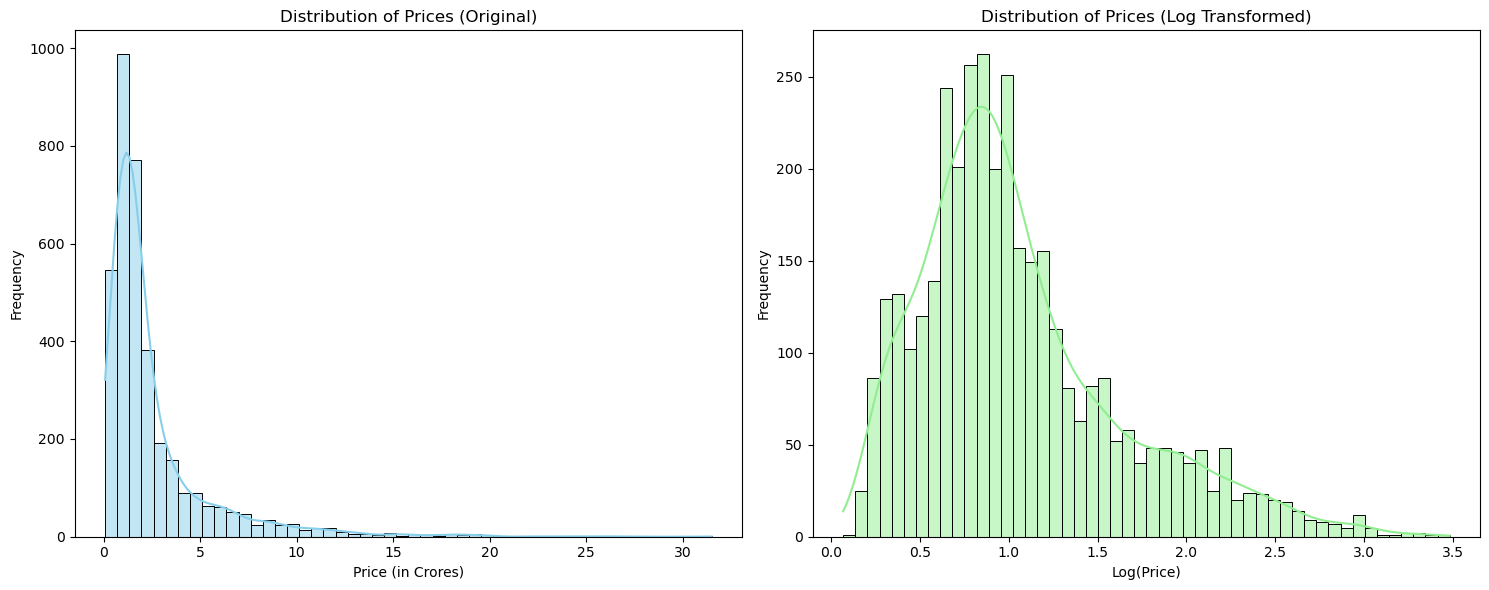

In [33]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. 
It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [34]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255326 0.9646692415449323


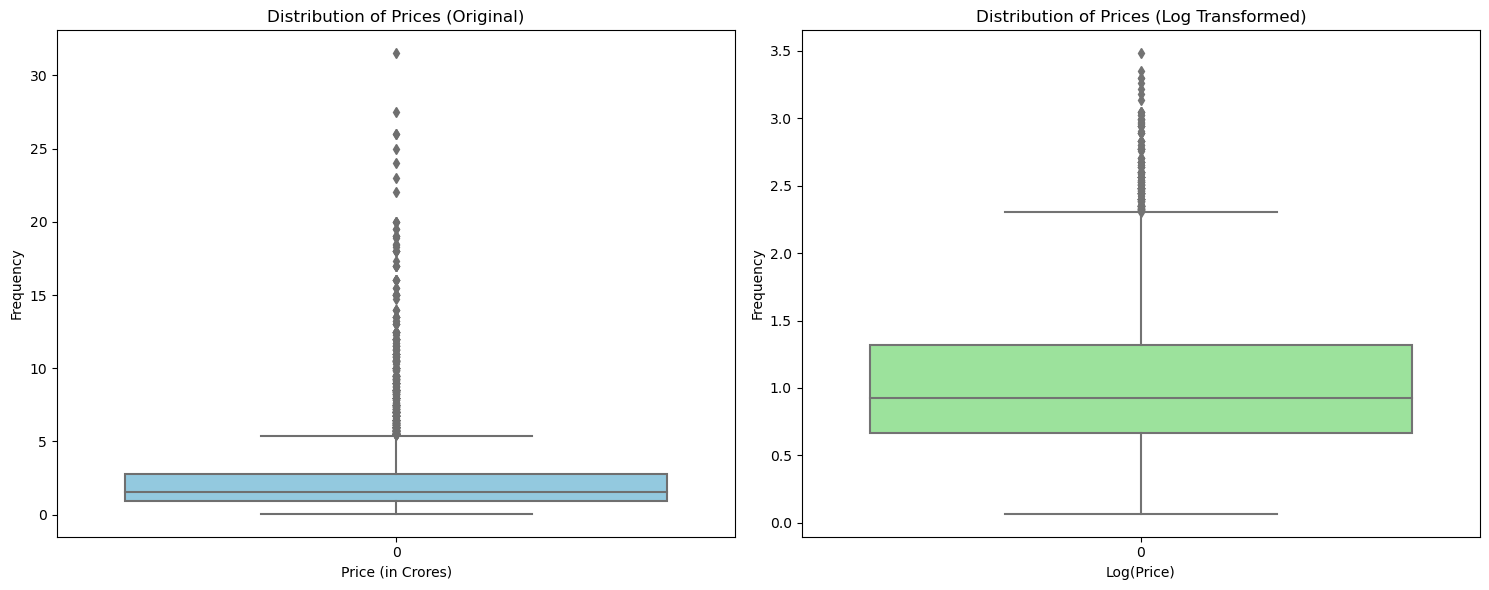

In [35]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### price_per_sqft

In [39]:
df = df.rename(columns = {"persf_area":"price_per_sqft"})

In [40]:
df['price_per_sqft'].isnull().sum()

17

In [41]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Count'>

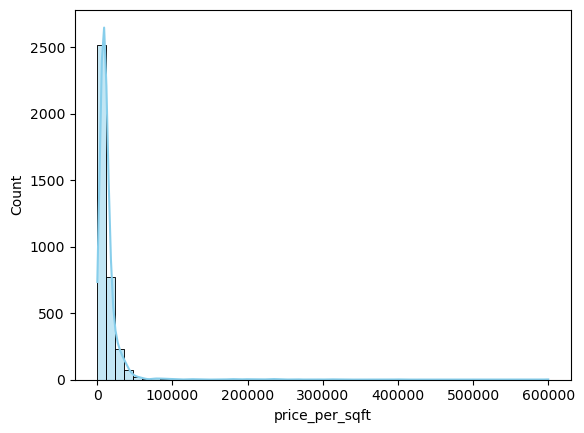

In [42]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: >

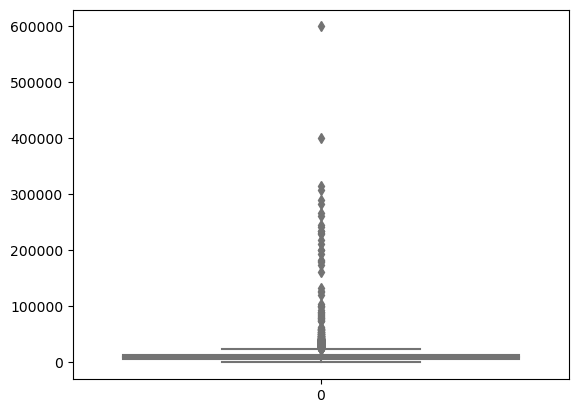

In [43]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

#### Observations

- Potential Outliers
- Right Skewed
- 17 missing values

### bedRoom

In [45]:
df['bedroom'].isnull().sum()

0

<Axes: xlabel='bedroom'>

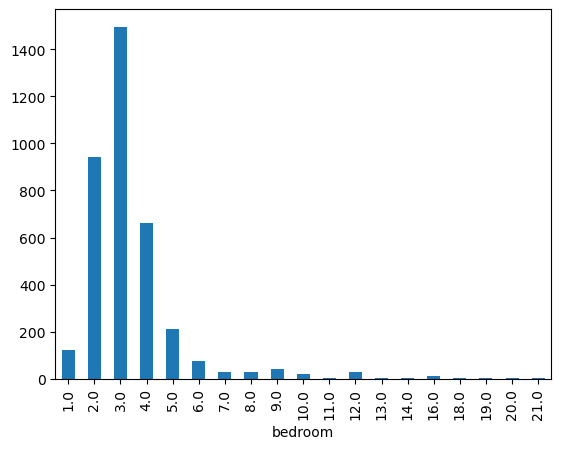

In [46]:
df['bedroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

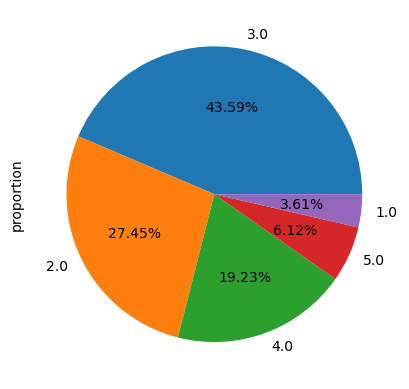

In [47]:
df['bedroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### bathroom

In [48]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

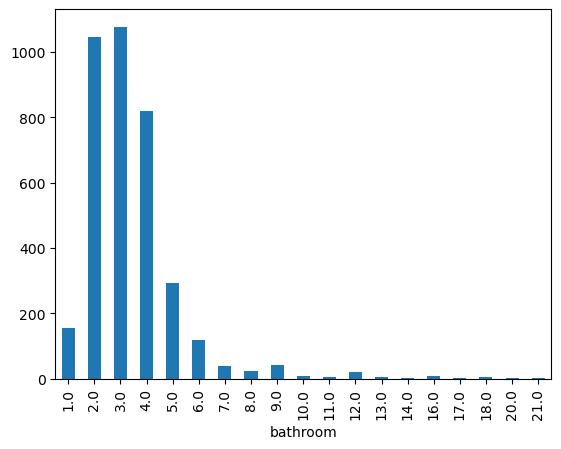

In [49]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

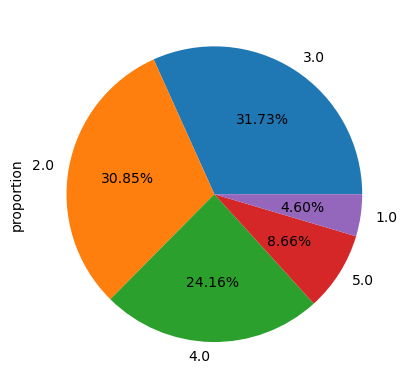

In [50]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [51]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.00,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,...,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.03,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,...,NaN,NaN,650.0,0,0,0,0,0,1,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.06,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,...,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.00,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,...,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.12,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,...,1345.0,NaN,NaN,1,0,0,0,0,0,0


### balcony

In [52]:
df['balcony'].isnull().sum()

86

<Axes: xlabel='balcony'>

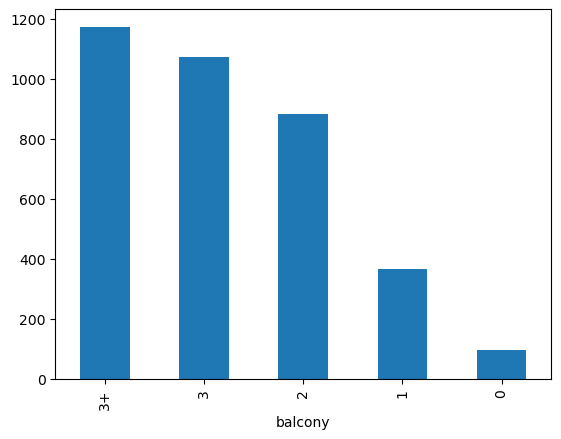

In [53]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

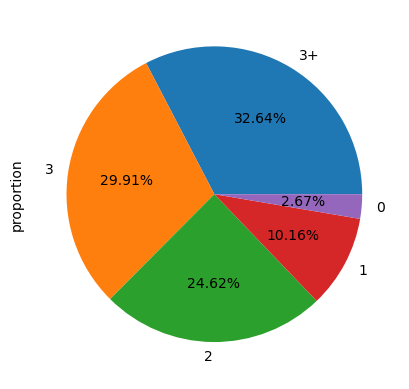

In [54]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [55]:
### floorNum

In [56]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,4.0,West,Relatively New,NaN,NaN,900.0,0,0,0,0,0,0,28
1,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,1,37
2,12.0,NaN,New Property,NaN,NaN,595.0,0,0,0,0,0,0,36
3,2.0,NaN,Under Construction,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,5.0,NaN,Under Construction,1345.0,NaN,NaN,1,0,0,0,0,0,0


In [57]:
df['floorNum'].isnull().sum()

19

In [58]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

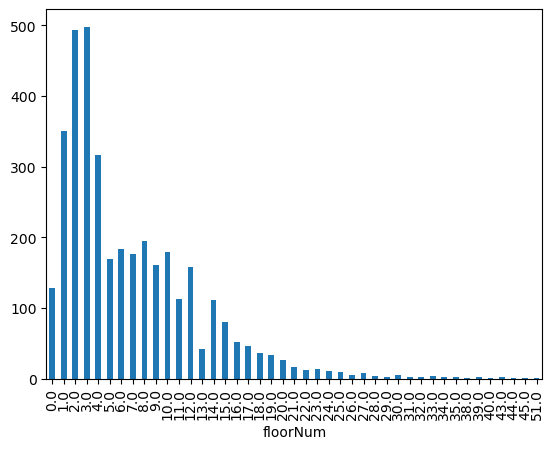

In [59]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

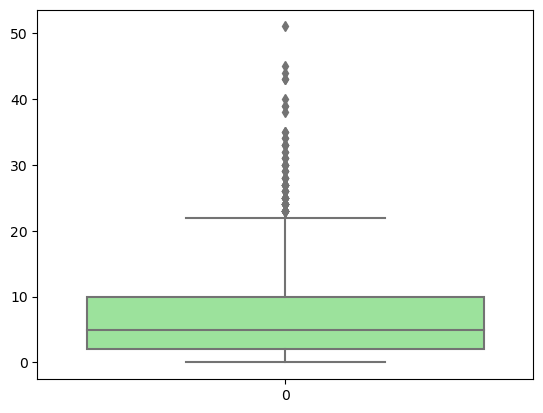

In [60]:
sns.boxplot(df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### facing

In [61]:
df['facing'].isnull().sum()

1045

In [62]:
df['facing'].fillna('NA',inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_29020\3692945726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


In [63]:
df['facing'].value_counts()

facing
NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

### agePossession

In [64]:
df['agePossession'].isnull().sum()

0

In [65]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

### areas

In [66]:
# super built up area
df['super_built_up_area'].isnull().sum()

1802

In [67]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Count'>

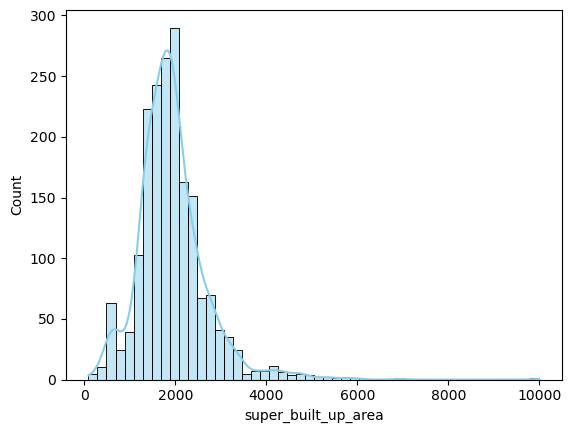

In [68]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

In [75]:
sdf = df['super_built_up_area'].dropna()

In [86]:
sdf = sdf.reset_index().drop(columns = ["index"])

<Axes: >

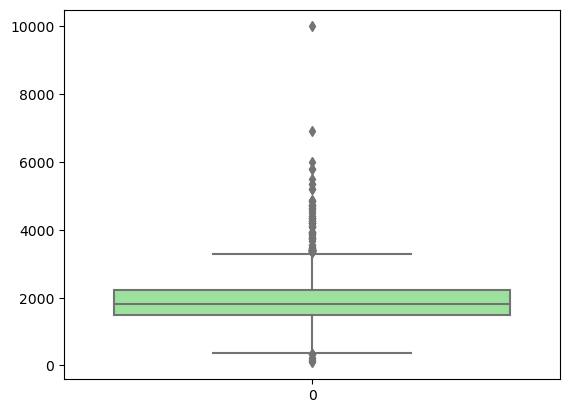

In [87]:
sns.boxplot(sdf["super_built_up_area"], color='lightgreen')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [88]:
# built up area
df['built_up_area'].isnull().sum()

1987

In [89]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Count'>

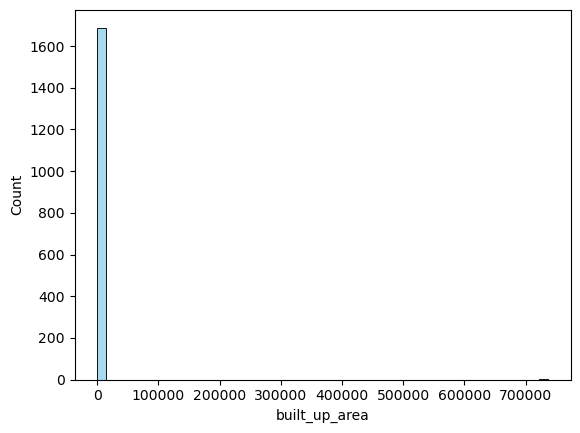

In [90]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: >

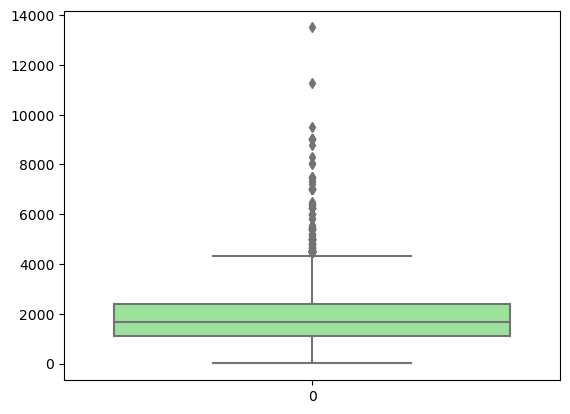

In [92]:
sdf = df['built_up_area'].dropna()
sdf = sdf.reset_index().drop(columns = ["index"])
sns.boxplot(sdf[sdf["built_up_area"]<20000]["built_up_area"], color='lightgreen')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.


The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [93]:
# carpet area
df['carpet_area'].isnull().sum()

1805

In [94]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Count'>

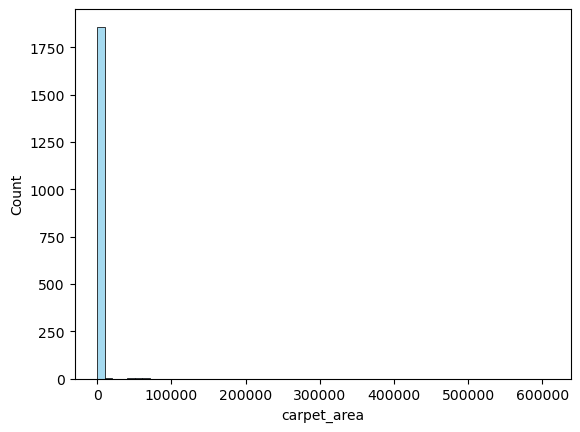

In [100]:
sns.histplot(df['carpet_area'].dropna(), bins=60, color='skyblue', kde=False)

<Axes: >

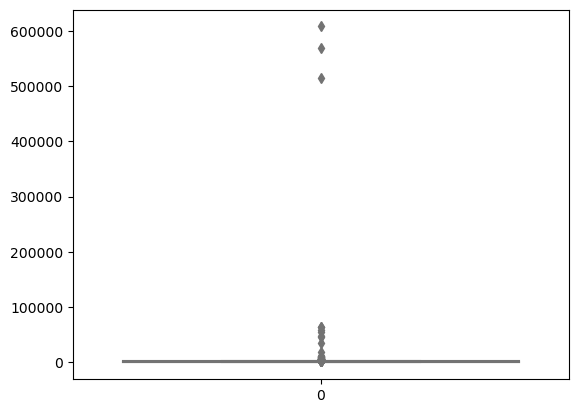

In [101]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

In [102]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,0,0,0,28
1,0,0,0,0,0,1,37
2,0,0,0,0,0,0,36
3,1,0,0,0,0,0,76
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
3676,0,0,1,0,0,1,96
3677,1,1,0,1,0,0,69
3678,1,0,0,0,0,0,35
3679,1,1,0,0,0,0,70


### additional rooms

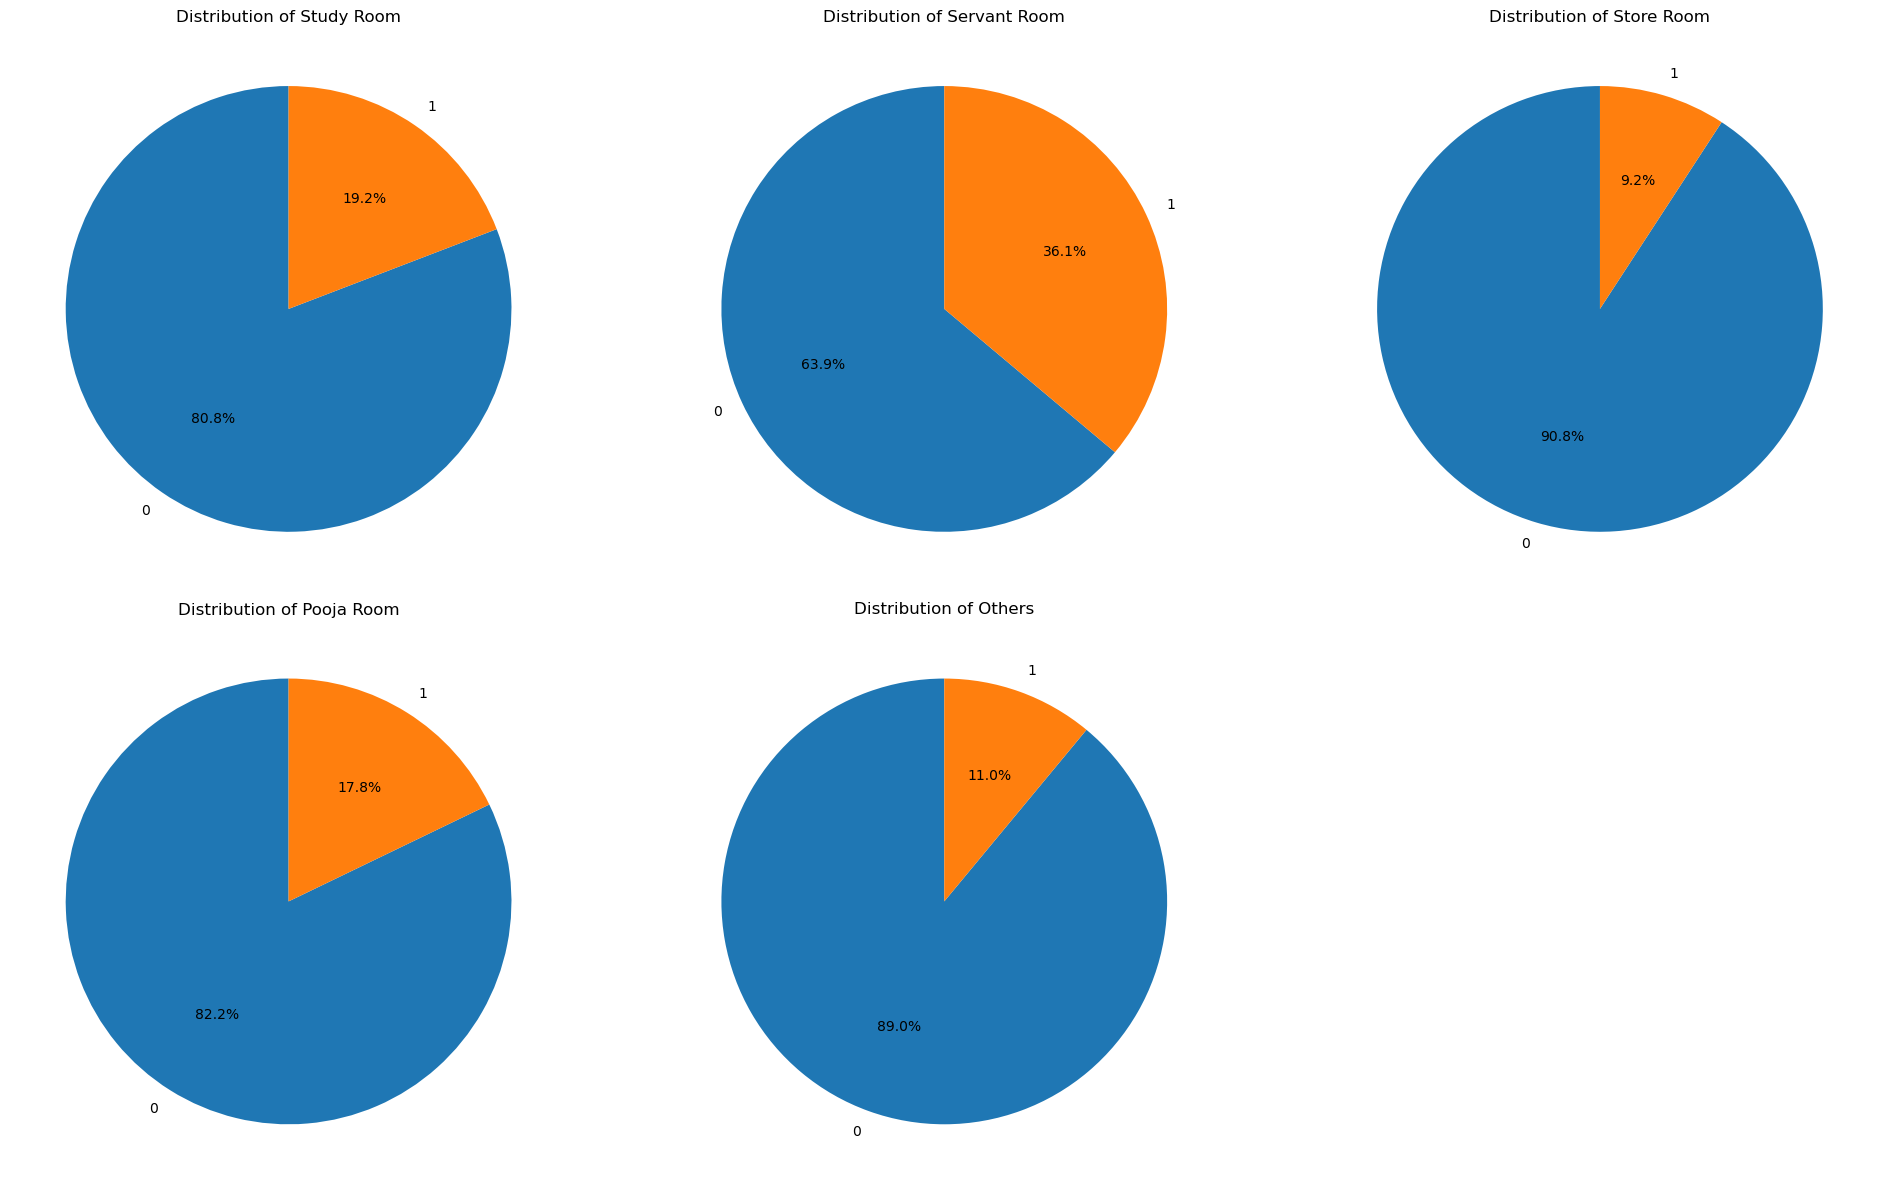

In [103]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### furnishing_type

In [104]:
df['furnishing_type'].value_counts()

furnishing_type
0    2436
1    1034
2     207
Name: count, dtype: int64

<Axes: ylabel='count'>

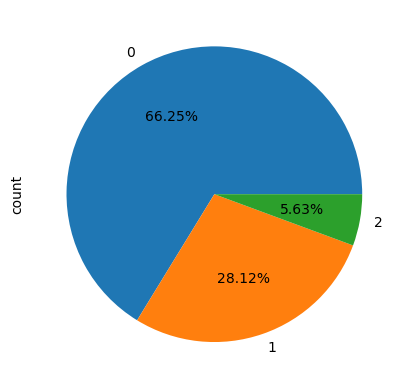

In [105]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### luxury score

In [106]:
df['luxury_score'].isnull().sum()

0

In [107]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='luxury_score', ylabel='Count'>

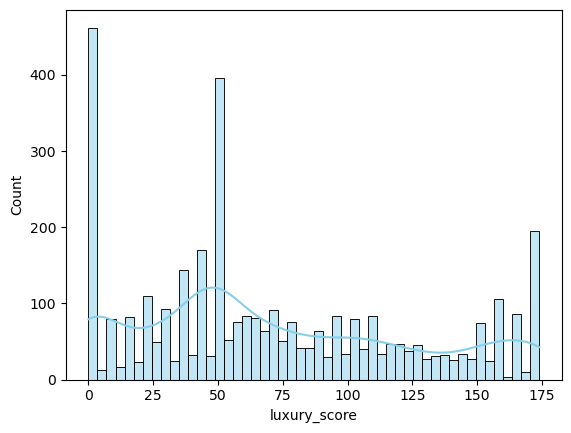

In [108]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: >

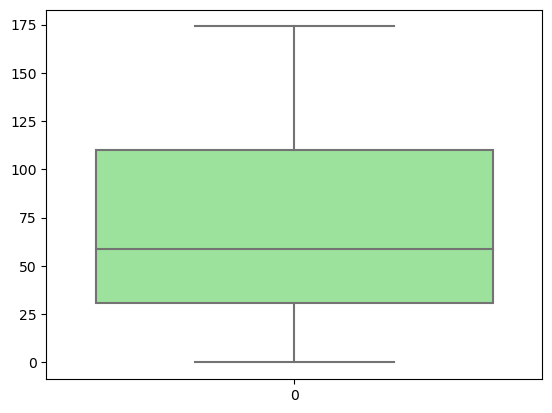

In [109]:
sns.boxplot(df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

In [110]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.00,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,...,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.03,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,...,NaN,NaN,650.0,0,0,0,0,0,1,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.06,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,...,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.00,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,...,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.12,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,...,1345.0,NaN,NaN,1,0,0,0,0,0,0
